In [1]:
# 파이썬 기본 패키지
import math  # 수학 함수 패키지
import itertools  # Functions creating iterators for efficient looping
from collections import Counter  # label별 데이터 카운트를 위한 모듈

# 데이터 핸들링을 위한 패키지
import numpy as np
import pandas as pd

# missingno 패키지 (데이터 전처리 전 결측치 확인)
import missingno as msno

# 전처리 및 모델 성능평가 관련 패키지
from sklearn.preprocessing import *  # 데이터 전처리를 위한 패키지
from sklearn.model_selection import *  # 데이터 분리, 검증 및 파라미터 튜닝을 위한 패키지
from sklearn.metrics import *  # 모델에 대한 다양한 성능 평가를 위한 패키지

# 시각화를 위한 패키지
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # 내장 colormap, colormap 처리 유틸리티
from matplotlib.colors import ListedColormap  # colors and colormaps
%matplotlib inline
# %matplotlib inline 의 목적은 plt.show()함수가 호출되지 않은 경우에도 matplotlib 다이어그램을 렌더링하는 것이다.
# 그러나 현재 업데이트된 버전의 주피터 노트북 버전에서는 %matplotlib inline 를 사용하지 않더라도 Matplotlib 다이어그램을 개체로 표현한다.
# 따라서 굳이 필요하지는 않다. 그러나 코드를 깨끗하게 유지하고 자신이 만든 플롯을 호출하기 위해 여전히 관례적으로 권장된다.

# 경고 메시지 무시
import warnings
warnings.filterwarnings('ignore')

# 그래프 스타일 서식 지정
plt.style.use('default')

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 그래프 축의 음수 표현 오류 방지
plt.rcParams['axes.unicode_minus'] = False
#
####################################################################################

# pingouin 패키지 (통계분석 관련)
import pingouin as pg

# SciPy 패키지
import scipy
import scipy.stats as stats  # 통계 분석을 위한 패키지
from scipy.cluster.hierarchy import *  # 계층적 군집 분석을 위한 패키지
from scipy.stats import randint, uniform  # 균일한 이산 확률 변수 및 연속 확률 변수

# statsmodels 패키지
from statsmodels.api import *
from statsmodels.formula.api import *
from statsmodels.stats.api import *
from statsmodels.stats.proportion import *
from statsmodels.stats.diagnostic import *
from statsmodels.stats.weightstats import *
from statsmodels.stats.outliers_influence import *  # 다중공선성 확인 관련 패키지
from statsmodels.multivariate.pca import PCA as stats_PCA  # sklearn 의 PCA와 겹치지 않도록 별칭 지정
from statsmodels.multivariate.pca import pca as stats_pca

# 분산분석 관련 패키지
import scikit_posthocs as sp  # 사후검정
from statsmodels.stats.multicomp import pairwise_tukeyhsd    # 사후검정
from statsmodels.sandbox.stats.multicomp import MultiComparison    # MultiComparison을 활용한 사후검정 시 사용
from statsmodels.graphics.factorplots import interaction_plot    # 상호작용효과 그래프 출력 시 사용

# 요인분석을 위한 패키지
from factor_analyzer import FactorAnalyzer


# scikit-learn 패키지
from sklearn.linear_model import *    # 선형 회귀 분석을 위한 패키지 (로지스틱 회귀 포함)

from sklearn.neighbors import *  # kNN 알고리즘 제공
from sklearn.svm import *  # 서포트 벡터 머신 알고리즘 제공
from sklearn.naive_bayes import *  # 나이브베이즈 분류 알고리즘 제공
from sklearn.neural_network import *  # 인공신경망 분류 알고리즘 제공
from sklearn.tree import *  # 결정트리 알고리즘 제공
from sklearn.ensemble import *  # 앙상블 알고리즘 제공
from sklearn.multiclass import OneVsRestClassifier  # multiclass 분류기 알고리즘 제공

from sklearn.cluster import *  # 비지도 군집화 알고리즘 제공
from sklearn.mixture import *  # 혼합분포군집(GMM 등) 알고리즘 제공

from sklearn.decomposition import *  # 차원축소 알고리즘 제공
from sklearn.feature_selection import *  # 알고리즘에 큰 영향을 미치는 feature를 우선순위대로 선택하는 기능 제공
from sklearn.pipeline import *  # feature 처리 등의 변환과 ML 알고리즘 학습/예측 등을 함께 묶어서 실행하는 유틸리티 제공


# mlxtend 패키지
from mlxtend.feature_selection import SequentialFeatureSelector as SFS  # 변수선택 알고리즘 포함
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs  # 변수선택 시각화
from mlxtend.plotting import plot_decision_regions  # 결정 경계 시각화
from mlxtend.preprocessing import *  # 연관분석에 필요한 트랜잭션 전처리 알고리즘 포함
from mlxtend.frequent_patterns import *  # 연관분석에 사용되는 알고리즘 포함 

# 시계열 관련 statsmodels 패키지
from statsmodels.tsa.api import *
from statsmodels.tsa.ar_model import *
from statsmodels.tsa.arima.model import *
from statsmodels.tsa.arima_process import *
from statsmodels.tsa.statespace import *
from statsmodels.tsa.stattools import *  # 시계열 관련 통계도구
from statsmodels.graphics.api import *
from statsmodels.graphics.tsaplots import *
#
####################################################################################

# [문제 1]

1. 연관규칙분석을 수행하기 위해 lotto 데이터셋을 transaction 데이터로 변환하시오. (단, 본 분석에서 로또번호가 추첨된 순서는 고려하지 않고 분석을 수행하도록 한다.)

2. 그리고 변환된 데이터에서 가장 많이 등장한 상위 10개의 로또번호를 막대그래프로 출력하고 이에 대해 설명하시오.

In [2]:
df_origin = pd.read_csv(r'.\rawdata\lotto.csv')
df_origin

,time_id,num1,num2,num3,num4,num5,num6
0,859,8,22,35,38,39,41
1,858,9,13,32,38,39,43
2,857,6,10,16,28,34,38
3,856,10,24,40,41,43,44
4,855,8,15,17,19,43,44
...,...,...,...,...,...,...,...
854,5,16,24,29,40,41,42
855,4,14,27,30,31,40,42
856,3,11,16,19,21,27,31
857,2,9,13,21,25,32,42


In [3]:
df_origin = df_origin.drop('time_id', axis=1)
df_origin

,num1,num2,num3,num4,num5,num6
0,8,22,35,38,39,41
1,9,13,32,38,39,43
2,6,10,16,28,34,38
3,10,24,40,41,43,44
4,8,15,17,19,43,44
...,...,...,...,...,...,...
854,16,24,29,40,41,42
855,14,27,30,31,40,42
856,11,16,19,21,27,31
857,9,13,21,25,32,42


# 데이터를 Transaction 데이터로 변환

- `mlxtend.preprocessing.TransactionEncoder()`
  - http://rasbt.github.io/mlxtend/user_guide/preprocessing/TransactionEncoder/

## DataFrame → List 변환

In [4]:
df_list = df_origin.values
df_list

array([[ 8, 22, 35, 38, 39, 41],
       [ 9, 13, 32, 38, 39, 43],
       [ 6, 10, 16, 28, 34, 38],
       ...,
       [11, 16, 19, 21, 27, 31],
       [ 9, 13, 21, 25, 32, 42],
       [10, 23, 29, 33, 37, 40]], dtype=int64)

## List → Transaction 변환

In [5]:
encoder = TransactionEncoder()

transaction = encoder.fit_transform(df_list)

transaction

array([[False, False, False, ..., False, False, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [6]:
df = pd.DataFrame( transaction,
                   columns = encoder.columns_ )
df

,1,2,3,4,5,6,7,8,9,10,...,36,37,38,39,40,41,42,43,44,45
0,False,False,False,False,False,False,False,True,False,False,...,False,False,True,True,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,True,True,False,False,False,True,False,False
2,False,False,False,False,False,True,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,True,True,False,True,True,False
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
854,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,False,False,False
855,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
856,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
857,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False


# 출현 빈도수 상위 10개 추출

In [7]:
count = Counter( df_list.flatten() )
count

Counter({8: 119,
         22: 92,
         35: 106,
         38: 113,
         39: 118,
         41: 105,
         9: 89,
         13: 122,
         32: 97,
         43: 125,
         6: 108,
         10: 122,
         16: 110,
         28: 105,
         34: 134,
         24: 115,
         40: 126,
         44: 113,
         15: 116,
         17: 123,
         19: 118,
         20: 124,
         25: 111,
         31: 118,
         36: 115,
         2: 112,
         23: 99,
         26: 116,
         27: 126,
         11: 120,
         30: 105,
         33: 121,
         14: 122,
         18: 121,
         5: 119,
         29: 106,
         1: 122,
         12: 123,
         42: 108,
         45: 121,
         7: 114,
         21: 112,
         4: 115,
         3: 111,
         37: 117})

In [8]:
df_count = pd.DataFrame( { 'number' : count.keys(),
                           'Count' : count.values() } )

top_10 = df_count.sort_values( 'Count', ascending=False )[:10]
top_10

,number,Count
14,34,134
16,40,126
28,27,126
9,43,125
21,20,124
19,17,123
37,12,123
11,10,122
32,14,122
7,13,122


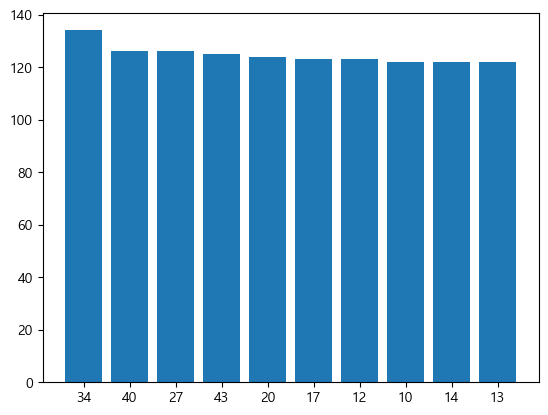

In [9]:
plt.bar( top_10.number.astype('str'),
         top_10.Count )
plt.show()

# [문제 2]

1. 변환한 데이터에 대해 apriori함수를 사용하여 다음 괄호 안의 조건을 반영하여 연관규칙을 생성하고, 이를 'rules_1'이라는 변수에 저장하여 결과를 해석하시오.  
   (최소 지지도: 0.002, 최소 신뢰도: 0.8, 최소조합 항목수: 2개, 최대조합 항목 수 :6개)

2. 그리고 도출된 연관규칙들을 향상도를 기준으로 내림차순 정렬하여 상위 30개의 규칙을 확인하고, 이를 데이터프레임으로 변환하여 csv파일로 출력하시오.

## 연관규칙: (support ≥ 0.002) and (confidence ≥ 0.8)

In [10]:
# support ≥ 0.002

support_set = apriori( df,
                         min_support = 0.002,
                         max_len = 6,
                         use_colnames = True )
support_set

,support,itemsets
0,0.142026,(1)
1,0.130384,(2)
2,0.129220,(3)
3,0.133877,(4)
4,0.138533,(5)
...,...,...
6358,0.002328,"(40, 43, 13, 14, 26)"
6359,0.002328,"(14, 15, 18, 21, 26)"
6360,0.002328,"(40, 14, 27, 30, 31)"
6361,0.002328,"(34, 44, 15, 19, 21)"


In [11]:
# confidence ≥ 0.8

rule = association_rules( support_set,
                            metric="confidence",
                            min_threshold = 0.8 )
rule

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(1, 3, 43)",(12),0.002328,0.143190,0.002328,1.0,6.983740,0.001995,inf
1,"(1, 3, 15)",(25),0.002328,0.129220,0.002328,1.0,7.738739,0.002027,inf
2,"(25, 3, 15)",(1),0.002328,0.142026,0.002328,1.0,7.040984,0.001998,inf
3,"(25, 3, 20)",(1),0.002328,0.142026,0.002328,1.0,7.040984,0.001998,inf
4,"(29, 3, 37)",(1),0.002328,0.142026,0.002328,1.0,7.040984,0.001998,inf
...,...,...,...,...,...,...,...,...,...
699,"(16, 26, 43, 31)",(36),0.002328,0.133877,0.002328,1.0,7.469565,0.002017,inf
700,"(16, 43, 36)","(26, 31)",0.002328,0.015134,0.002328,1.0,66.076923,0.002293,inf
701,"(16, 26, 36)","(43, 31)",0.002328,0.018626,0.002328,1.0,53.687500,0.002285,inf
702,"(16, 26, 43)","(36, 31)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf


In [12]:
rule.insert( 0, 'length',
                      rule.antecedents.apply( lambda x: len(x) )  )

rule

,length,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,3,"(1, 3, 43)",(12),0.002328,0.143190,0.002328,1.0,6.983740,0.001995,inf
1,3,"(1, 3, 15)",(25),0.002328,0.129220,0.002328,1.0,7.738739,0.002027,inf
2,3,"(25, 3, 15)",(1),0.002328,0.142026,0.002328,1.0,7.040984,0.001998,inf
3,3,"(25, 3, 20)",(1),0.002328,0.142026,0.002328,1.0,7.040984,0.001998,inf
4,3,"(29, 3, 37)",(1),0.002328,0.142026,0.002328,1.0,7.040984,0.001998,inf
...,...,...,...,...,...,...,...,...,...,...
699,4,"(16, 26, 43, 31)",(36),0.002328,0.133877,0.002328,1.0,7.469565,0.002017,inf
700,3,"(16, 43, 36)","(26, 31)",0.002328,0.015134,0.002328,1.0,66.076923,0.002293,inf
701,3,"(16, 26, 36)","(43, 31)",0.002328,0.018626,0.002328,1.0,53.687500,0.002285,inf
702,3,"(16, 26, 43)","(36, 31)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf


In [13]:
result = rule[ rule.length >=2 ]

result = result.sort_values('lift', ascending=False )[:10]

result

,length,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
703,3,"(16, 26, 31)","(43, 36)",0.002328,0.012806,0.002328,1.0,78.090909,0.002298,inf
643,3,"(24, 34, 22)","(31, 7)",0.002328,0.012806,0.002328,1.0,78.090909,0.002298,inf
642,3,"(34, 31, 7)","(24, 22)",0.002328,0.012806,0.002328,1.0,78.090909,0.002298,inf
682,3,"(26, 21, 14)","(18, 15)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf
652,3,"(34, 10, 36)","(44, 22)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf
646,3,"(24, 22, 31)","(34, 7)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf
666,3,"(24, 20, 15)","(12, 30)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf
702,3,"(16, 26, 43)","(36, 31)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf
700,3,"(16, 43, 36)","(26, 31)",0.002328,0.015134,0.002328,1.0,66.076923,0.002293,inf
653,3,"(34, 10, 22)","(36, 44)",0.002328,0.016298,0.002328,1.0,61.357143,0.002290,inf


# [문제 3]

In [14]:
result_2 = rule[rule['consequents'].apply(lambda x: 34 in list(x))]
result_2

,length,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,3,"(1, 5, 13)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf
50,3,"(2, 4, 31)",(34),0.003492,0.155995,0.003492,1.0,6.410448,0.002948,inf
68,3,"(2, 21, 15)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf
72,3,"(2, 28, 15)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf
192,3,"(5, 29, 13)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf
203,3,"(17, 5, 29)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf
281,3,"(7, 22, 31)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf
282,3,"(24, 31, 7)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf
419,3,"(12, 37, 36)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf
471,3,"(25, 44, 14)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf


In [15]:
result_2.shape

(23, 10)